<a href="https://colab.research.google.com/github/Jorge2018/DataScience2022-2/blob/main/Script_simulacionExamenUlt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
import tensorflow as tf
df=pd.read_csv(r'https://raw.githubusercontent.com/Jorge2018/RepositorioArchivos/main/flight_df%20-%20flight_df.csv')

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                20000 non-null  int64
 1   Class                              20000 non-null  int64
 2   Flight Distance                    20000 non-null  int64
 3   Inflight wifi service              20000 non-null  int64
 4   Departure/Arrival time convenient  20000 non-null  int64
 5   Ease of Online booking             20000 non-null  int64
 6   Gate location                      20000 non-null  int64
 7   Food and drink                     20000 non-null  int64
 8   Online boarding                    20000 non-null  int64
 9   Seat comfort                       20000 non-null  int64
 10  Inflight entertainment             20000 non-null  int64
 11  On-board service                   20000 non-null  int64
 12  Leg room service  

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,3,2,0,0,0,1,1,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,4,18,2,0,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,4,5,3,0,0,1,1,0,0
3,54,3,453,3,5,5,5,3,4,4,...,3,4,3,1,91,80,0,1,1,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,3,4,0,0,1,1,1,0


*Exploracion de datos*

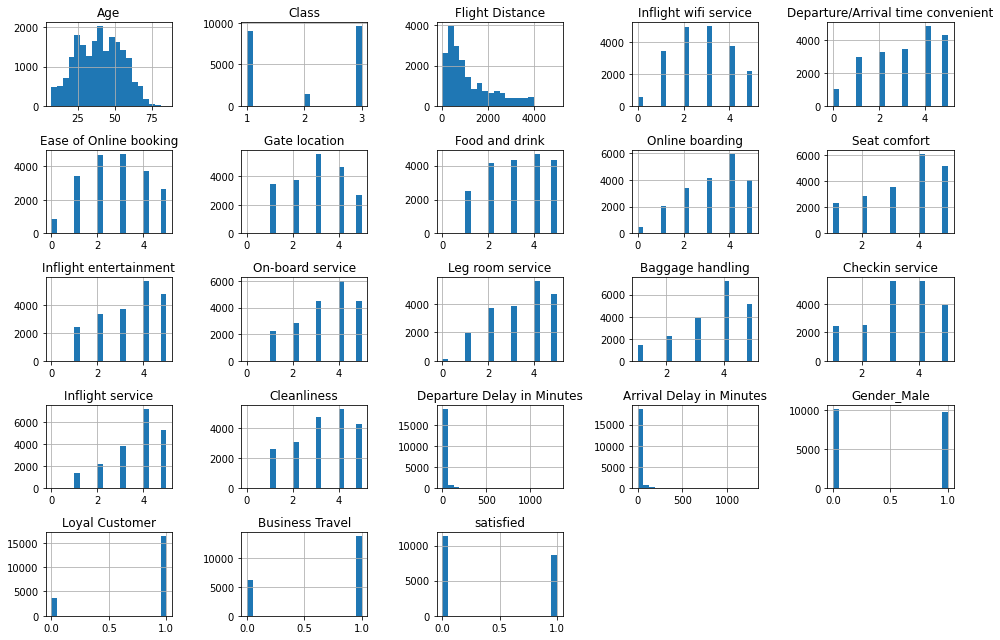

In [44]:
df.hist(bins=20,figsize=(14,9))
plt.tight_layout()
plt.show()

*Podemos observar que el rango de edades fluctua entre los 10 y 80 años aprox. teniendo como peak el rango entre 30/35*

*Podemos observar la existencia de 3 tipos de clases teniendo como mayor parte de la muestra la clase 3, en segundo lugar y no tan alejado la clase 1 y en tercer lugar pero con una minima parte de la muestra la clase 2*

*Podemos observar que el rango de vuelo de distancia, esta entre los 20 y 4500, teniendo como peak los vuelos de 400/700 de distancia*

*Podemos observar que los servicios de wifi a bordo son 6, teniendo como maximos exponentes los servicios 2 y 3*

*Podemos observar que los tiempos convenidos de llegada/salida son 6, teniendo como maximos exponentes los servicios 4 y 5*

*Podemos observar que la facilidad para la reserva online tiene 6 aperturas, teniendo como maximos exponentes los servicios 2 y 3*

*Podemos observar que la ubicacion de la puerta tiene 6 aperturas, teniendo como maximos exponentes los servicios 4 y 3*

*Podemos observar que la comida y bebida tiene 6 aperturas, con un nivel parejo de muestras para 2,3,4,5 y la baja las muestras 0,1*

*Podemos observar que el embarque en linea tiene 6 aperturas, con la muestra 4 como maximo exponente*

*Podemos observar que la comididad del asiento tiene 6 aperturas, con la muestra 4 como maximo exponente*

*Podemos observar que el entretenimiento a bordo tiene 6 aperturas, con la muestra 4 como maximo exponente*

*Podemos observar que el servicio a bordo tiene 6 aperturas, con la muestra 4 como maximo exponente*

*Podemos observar que el espacio entre piernas tiene 6 aperturas, con la muestra 4 como maximo exponente*

*Podemos observar que el manejo del equipaje tiene 6 aperturas, con la muestra 4 como maximo exponente*

*Podemos observar que el servicio de chequeo tiene 6 aperturas, y tiene como maximos exponentes las muestras 3,4*

*Podemos observar que el servicio a bordo tiene 6 aperturas, teniendo como maximo exponente la muestra 4*

*Podemos observar que la limpieza tiene 6 aperturas, teniendo como maximo exponente la muestra 4*

*Podemos observar que los minutos de descenso al salir,se muestran en rangos de 0 a 1200 aprox, con un peak de 30-100 minutos*

*Podemos observar que los minutos de descenso al llegar,se muestran en rangos de 0 a 1200 aprox, con un peak de 30-100 minutos*

*Podemos observar que la muestra entre genero es muy similar con una leve mayoria del codigo 0*

*Podemos observar que la lealtad del cliente contiene dos categorias con una leve mayoria de la categoria 1*

*Podemos observar que los viajes de negocio contiene dos categorias con una leve mayoria de la categoria 1*

*Podemos observar que la satisfaccion contiene dos categorias con una leve mayoria de la categoria 0*

*Mapa de calor, exploracion de datos*

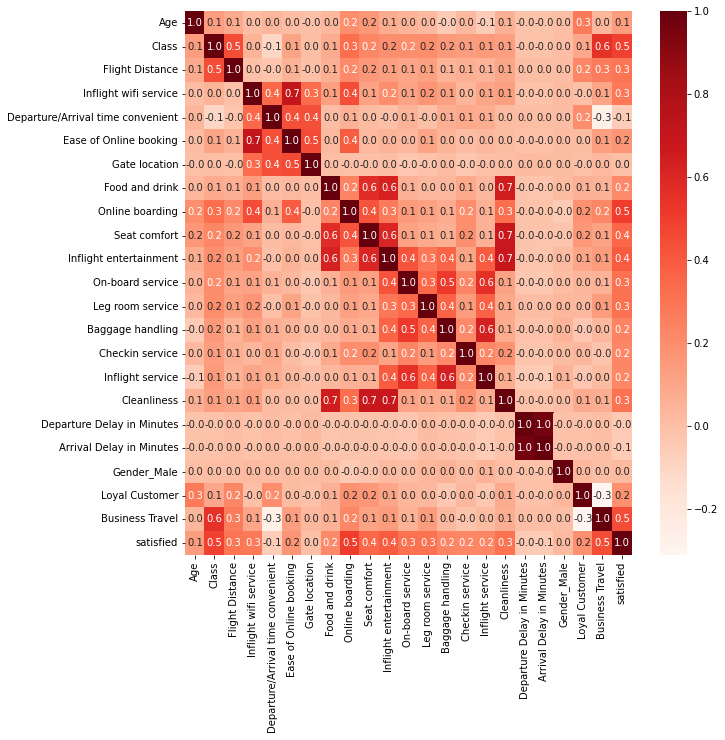

In [45]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Reds', annot=True, fmt='.1f')
plt.show()

*El siguiente resumen de  columnas tienen una correlacion igual o superior al 50 %*

**class/flight distance,
class/satisfied,
class/business travel,
satisfied/online boarding,
satidfied/bussiness travel,
cleanliness/food an drink,
cleanliness/seat confort,
cleanliness/inflight entertainment**

*Aplica sobre datos de entrenamiento y test Selector,Transformador,Imputer,Pipeline*

In [57]:
print('Number of Duplicated Rows', df.duplicated().sum())
print('\n')
print(df.info())
print('\n')
df.describe()

Number of Duplicated Rows 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                20000 non-null  int64
 1   Class                              20000 non-null  int64
 2   Flight Distance                    20000 non-null  int64
 3   Inflight wifi service              20000 non-null  int64
 4   Departure/Arrival time convenient  20000 non-null  int64
 5   Ease of Online booking             20000 non-null  int64
 6   Gate location                      20000 non-null  int64
 7   Food and drink                     20000 non-null  int64
 8   Online boarding                    20000 non-null  int64
 9   Seat comfort                       20000 non-null  int64
 10  Inflight entertainment             20000 non-null  int64
 11  On-board service                   20000 non-null 

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied,cluster2,cluster3
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.00000
mean,39.477250,2.027800,1188.548000,2.727950,3.056100,2.751100,2.971350,3.202100,3.255300,3.439100,...,3.635550,3.282650,14.318350,14.698250,0.490650,0.817850,0.687900,0.43305,0.544850,3.96480
std,15.108901,0.963054,1001.136957,1.326886,1.531134,1.396799,1.279575,1.332383,1.348485,1.323434,...,1.184017,1.311734,36.451829,36.899857,0.499925,0.385978,0.463362,0.49551,0.497997,2.14238
min,7.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,27.000000,1.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,2.00000
50%,40.000000,2.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,1.000000,4.00000
75%,51.000000,3.000000,1733.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,1.000000,1.00000,1.000000,6.00000
max,85.000000,3.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,1305.000000,1280.000000,1.000000,1.000000,1.000000,1.00000,1.000000,7.00000


*Revision del proceso de Selector,Transformador,Imputer*

In [58]:
# Scale the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied,cluster2,cluster3
0,-0.892030,1.009522,0.872482,-0.548629,-0.036640,0.178198,0.022391,-0.902241,-0.930920,-1.087425,...,-0.536788,-0.977853,-0.392812,-0.398338,-0.981472,0.47193,0.673572,-0.873970,0.913984,-0.450352
1,0.828853,1.009522,-0.507983,1.712360,1.269614,1.610079,1.585449,-0.151687,0.552263,0.423832,...,0.307816,0.546885,0.101003,-0.344136,-0.981472,0.47193,0.673572,1.144204,-1.094111,-1.383916
2,-0.759654,-1.067256,-0.999437,0.205034,1.269614,0.178198,0.803920,-0.151687,-0.189328,-0.331797,...,1.152419,-0.215484,-0.392812,-0.398338,1.018878,0.47193,-1.484622,-0.873970,0.913984,1.416778
3,0.961229,1.009522,-0.734731,0.205034,1.269614,1.610079,1.585449,-0.151687,0.552263,0.423832,...,-0.536788,-1.740222,2.103696,1.769746,-0.981472,0.47193,0.673572,-0.873970,0.913984,0.949995
4,0.034600,-1.067256,-0.413089,0.958697,-0.036640,0.178198,0.022391,0.598867,0.552263,0.423832,...,-0.536788,0.546885,-0.392812,-0.398338,1.018878,0.47193,0.673572,-0.873970,0.913984,0.949995


*Metodo del codo y silhouette*

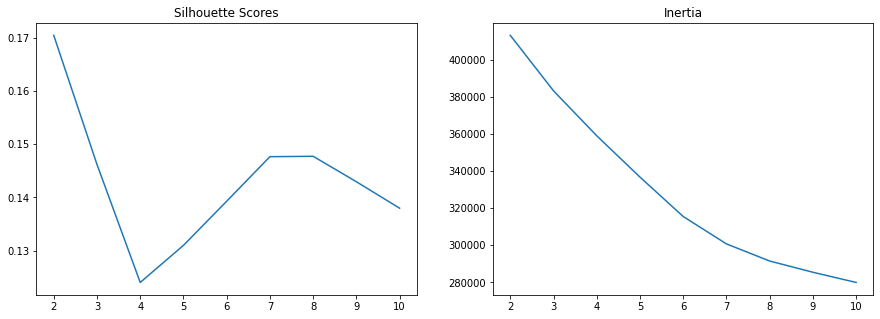

In [59]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

*Podemos observar que agrupar los datos en 2 grupos nos da la mejor puntuación de silueta y podemos detectar un codo en el trazado de inercia en 6. Si bien el trazado de inercia no tiene un codo muy pronunciado en ningún número, la puntuación de silueta parece favorecer los grupos 2 o 8. Escogeremos el 2. Ajustemos un nuevo modelo con 2 clústeres y agreguemos esos clústeres a una nueva columna en nuestro dataframe original (sin escala)*

# Analizar los clústeres

*Valores medios de cada característica , para entender los clústeres en su conjunto. Esto valores nos dan la idea del clúster en su conjunto.
Agruparemos los datos por clúster y agregaremos los grupos por los valores medios de cada característica.*

In [63]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied,cluster2,cluster3
0,0,37.208131,1.599523,908.790034,2.302469,3.013398,2.452602,2.936772,2.719372,2.576764,...,3.247040,2.698449,15.756906,16.376893,0.477287,0.756538,0.533633,0.105534,1.0,4.606681
1,1,42.193563,2.540481,1523.440075,3.237284,3.107217,3.108426,3.012743,3.779963,4.067560,...,4.100626,3.981984,12.596287,12.688784,0.506646,0.891245,0.872569,0.825113,0.0,3.196419


# Visualizacion de cluster

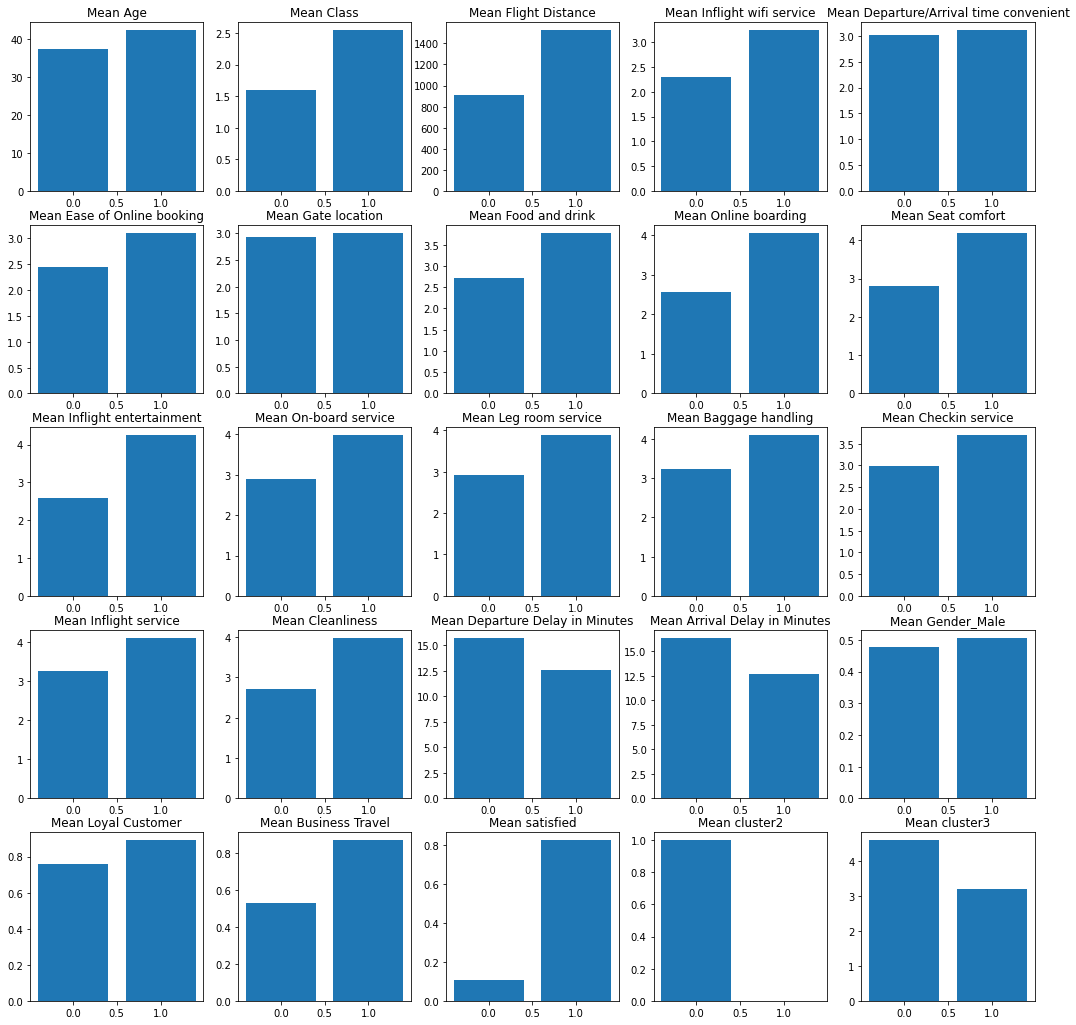

In [88]:
# Visualize means 
fig, axes = plt.subplots(5,5, figsize = (18, 18))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')


# Comparativa entre clusters

El clúster 0 tiene una tasa un poco menor que el cluster 1 en cuanto a edad.
El clúster 0 tiene una tasa bastante menor que el cluster 1 en cuanto a class. 
El clúster 0 tiene una tasa bastante menor que el cluster 1 en cuanto a distancia de vuelo. 
El clúster 0 tiene una tasa bastante menor que el cluster 1 en cuanto a servicio de wifi.  
El clúster 0 tiene una tasa un poco menor que el cluster 1 en cuanto al tiempo de llegada/salida.
El clúster 0 tiene una tasa un poco menor que el cluster 1 en cuanto al booking online.
El clúster 0 tiene una tasa bastante similar (casi identica) que el cluster 1 en cuanto a gate location.
El clúster 0 tiene una tasa bastante menor que el cluster 1 en cuanto a comida y bebida.
El clúster 0 tiene una tasa bastante menor que el cluster 1 en cuanto a online boarding.
El clúster 0 tiene una tasa bastante menor que el cluster 1 en cuanto a seat comfort.
El clúster 0 tiene una tasa bastante menor que el cluster 1 en cuanto a inflight entertainment.
El clúster 0 tiene una tasa bastante menor que el cluster 1 en cuanto a on board service.
El clúster 0 tiene una tasa bastante menor que el cluster 1 en cuanto a leg room service.
El clúster 0 tiene una tasa bastante menor que el cluster 1 en cuanto a baggage handling.
El clúster 0 tiene una tasa bastante menor que el cluster 1 en cuanto a checking service.
El clúster 0 tiene una tasa bastante menor que el cluster 1 en cuanto a inflight service.      
   


La esperanza de vida está más cerca a los clústeres 2 y 3, 
pero sigue siendo muy baja. Los clústeres 0 y 1 son similares, 
pero las naciones en el clúster 0 parecen tender a estar un poco más desarrolladas y 
pueden tener cierta industrialización y recursos naturales para comerciar con otras naciones. 
El clúster 0 tiene exportaciones similares al clúster 2, 
a pesar del bajo ingreso promedio y PIB por persona. 
Además del clúster 1, estas naciones pueden ser buenos candidatos para actividades benéficas de las partes interesadas. 
Sin embargo, parecen estar en una posición levemente mejor.

# ACP
*Preparacion para aprendizaje automatico*

In [104]:
# Save X data
X = X_scaled.drop(columns = 'satisfied')
y = X_scaled['satisfied']
print('El numero de filas/columnas antes de ACP es:',X.shape)

El numero de filas/columnas antes de ACP es: (20000, 24)


# Elección del número de componentes a devolver

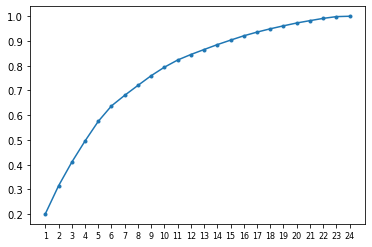

In [106]:
pca = PCA()
pca.fit(X)
plt.plot(range(1, 25), pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks=range(1,25), fontsize=8);

#Método del codo

*Según el gráfico de abajo, ¿cuántos componentes principales deberíamos mantener? En el “codo” o el punto de inflexión en el gráfico anterior se pueden ver alrededor de 7 componentes principales. Aquí es donde no conseguimos muchas ventajas más allá de aumentar el número de componentes, por lo que representa un buen balance.*

Text(0, 0.5, 'Proportion of Explained Variance')

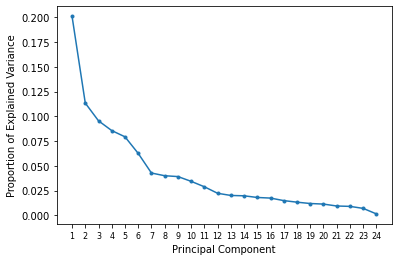

In [100]:
plt.plot(range(1, 25), pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1, 25), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

In [110]:
X = df.drop(columns = 'satisfied')
y = df['satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
transformer = make_pipeline(StandardScaler(), PCA(n_components=7))


logreg = LogisticRegression()
# Create a modeling pipeline
logreg_pipe = make_pipeline(transformer, logreg)
logreg_pipe.fit(X_train, y_train)
print('Training accuracy:', logreg_pipe.score(X_train, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test, y_test))



Training accuracy: 0.8443333333333334
Testing accuracy: 0.8516


*Pasamos de 24 características a solo 7 y seguimos teniendo una precisión de las pruebas de alrededor del 85 % en nuestros datos de prueba.*

# Perceptron

In [121]:
X = df.drop(columns = 'satisfied')
y = df['satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
transformer = make_pipeline(StandardScaler())
per = Perceptron()
per_pipe = make_pipeline(transformer, per)
per_pipe.fit(X_train, y_train)
print("Training score:", per_pipe.score(X_train, y_train))
print("Test score:", per_pipe.score(X_test, y_test))

Training score: 0.8068571428571428
Test score: 0.8091666666666667


# Regularizacion NN

In [114]:
X = df.drop(columns = 'satisfied')
y = df['satisfied']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Input shape
input_shape = X_train.shape[1]


# Modelo sin regularización
model = Sequential()
# Primera capa oculta
model.add(Dense(19,
                input_dim = input_shape, 
                activation = 'relu')) 
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val), 
                    epochs=100)



Epoch 1/100
400/400 [==============================] - 2s 5ms/step - loss: 0.4239 - val_loss: 0.3155
Epoch 2/100
400/400 [==============================] - 1s 4ms/step - loss: 0.2650 - val_loss: 0.2573
Epoch 3/100
400/400 [==============================] - 2s 4ms/step - loss: 0.2190 - val_loss: 0.2309
Epoch 4/100
400/400 [==============================] - 2s 4ms/step - loss: 0.1956 - val_loss: 0.2096
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 0.1823 - val_loss: 0.1963
Epoch 6/100
400/400 [==============================] - 1s 2ms/step - loss: 0.1728 - val_loss: 0.1908
Epoch 7/100
400/400 [==============================] - 1s 2ms/step - loss: 0.1670 - val_loss: 0.1878
Epoch 8/100
400/400 [==============================] - 1s 2ms/step - loss: 0.1624 - val_loss: 0.1787
Epoch 9/100
400/400 [==============================] - 1s 2ms/step - loss: 0.1579 - val_loss: 0.1757
Epoch 10/100
400/400 [==============================] - 1s 2ms/step - loss: 0.1554 - val_lo

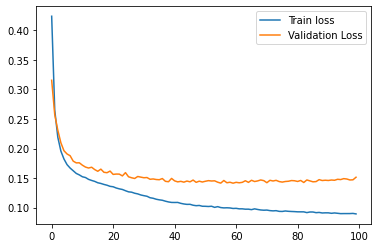

In [115]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend();

# Regularizacion l1, l2

In [117]:
model = Sequential()
# Primera capa oculta
model.add(Dense(19, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de tus características de entrada (número de columnas)?
                activation = 'relu',
                kernel_regularizer=l2(0.01))) # ¿Qué función de activación estás usando?
model.add(Dense(10, 
                activation = 'relu',
                kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history_l2 = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val), 
                    epochs=100)

Epoch 1/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6908 - val_loss: 0.4936
Epoch 2/100
400/400 [==============================] - 1s 3ms/step - loss: 0.4239 - val_loss: 0.3912
Epoch 3/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3457 - val_loss: 0.3301
Epoch 4/100
400/400 [==============================] - 1s 3ms/step - loss: 0.2995 - val_loss: 0.2975
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 0.2753 - val_loss: 0.2790
Epoch 6/100
400/400 [==============================] - 1s 2ms/step - loss: 0.2615 - val_loss: 0.2674
Epoch 7/100
400/400 [==============================] - 1s 2ms/step - loss: 0.2516 - val_loss: 0.2601
Epoch 8/100
400/400 [==============================] - 1s 2ms/step - loss: 0.2450 - val_loss: 0.2519
Epoch 9/100
400/400 [==============================] - 2s 5ms/step - loss: 0.2384 - val_loss: 0.2496
Epoch 10/100
400/400 [==============================] - 1s 3ms/step - loss: 0.2345 - val_lo

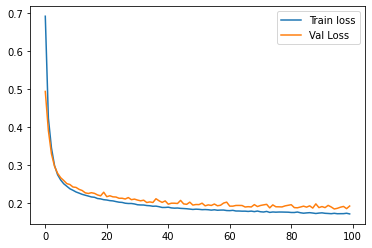

In [118]:
plt.plot(history_l2.history['loss'], label='Train loss')
plt.plot(history_l2.history['val_loss'], label='Val Loss')
plt.legend();